In [1]:
using DSP
using PyPlot

INFO: Recompiling stale cache file /home/vhmar/.julia/lib/v0.6/MacroTools.ji for module MacroTools.
INFO: Recompiling stale cache file /home/vhmar/.julia/lib/v0.6/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/vhmar/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


In [2]:
datE = readdlm("MA02_BHE_2006-032-2-1-43.42.txt")
datN = readdlm("MA02_BHN_2006-032-2-1-43.42.txt")
datZ = readdlm("MA02_BHZ_2006-032-2-1-43.42.txt");

In [3]:
n = length(datE[:,2]);
fs = round(1/((datN[2,1]-datN[1,1])*86400))
dt = 1/fs


0.025

In [13]:
ti = (linspace(1,n,n))*dt;
ds = 1/(dt*n)
sn = 0.5/dt
nn = convert(Int,floor(n/2) + 1)
s = collect(1:n)*ds;

48000-element Array{Float64,1}:
  0.000833333
  0.00166667 
  0.0025     
  0.00333333 
  0.00416667 
  0.005      
  0.00583333 
  0.00666667 
  0.0075     
  0.00833333 
  0.00916667 
  0.01       
  0.0108333  
  ⋮          
 39.9908     
 39.9917     
 39.9925     
 39.9933     
 39.9942     
 39.995      
 39.9958     
 39.9967     
 39.9975     
 39.9983     
 39.9992     
 40.0        

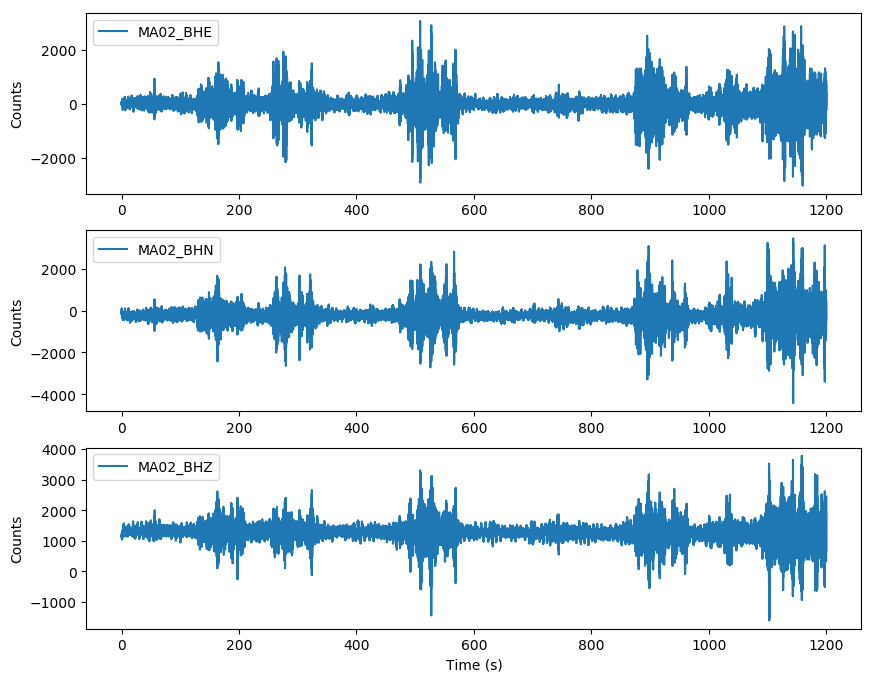

PyObject <matplotlib.legend.Legend object at 0x7f3c76bc3dd0>

In [6]:
fig = figure(figsize=(10,8))
#subplots_adjust(hspace=0.0)
subplot(3,1,1)
#ax1 = gca()
plot(ti,datE[:,2], label="MA02_BHE")
ylabel("Counts")
legend(loc="best")
#setp(ax1[:get_xticklabels](),visible=false)
#ax = gca()
#title("MA02_BHE")
subplot(3,1,2)
#ax2 = gca()
plot(ti,datN[:,2],label="MA02_BHN")
ylabel("Counts")
legend(loc="best")
#setp(ax2[:get_xticklabels](),visible=false)
#ax = gca()
#title("MA02_BHN")
subplot(3,1,3)
#ax3 = gca()
plot(ti,datZ[:,2], label="MA02_BHZ")
ylabel("Counts")
xlabel("Time (s)")
legend(loc="best")
#ax = gca()
#title("MA02_BHZ")
#fig[:canvas][:draw]()

In [7]:
foE = fft(datE[:,2],1)
foE[1] = 0
foN = fft(datN[:,2],1)
foN[1] = 0
foZ = fft(datZ[:,2],1);
foZ[1] = 0;

In [15]:
size(s)

(48000,)

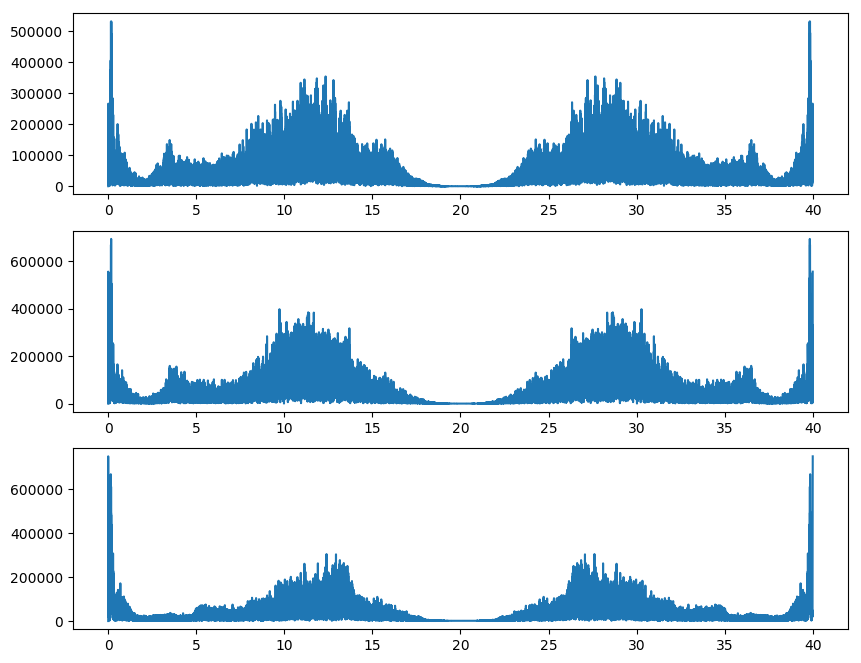

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3c722468d0>

In [17]:
fig = figure(figsize=(10,8))
subplot(311)
plot(s,abs.(foE))
subplot(312)
plot(s,abs.(foN))
subplot(313)
plot(s,abs.(foZ))

In [8]:
size(s)

(48000,)

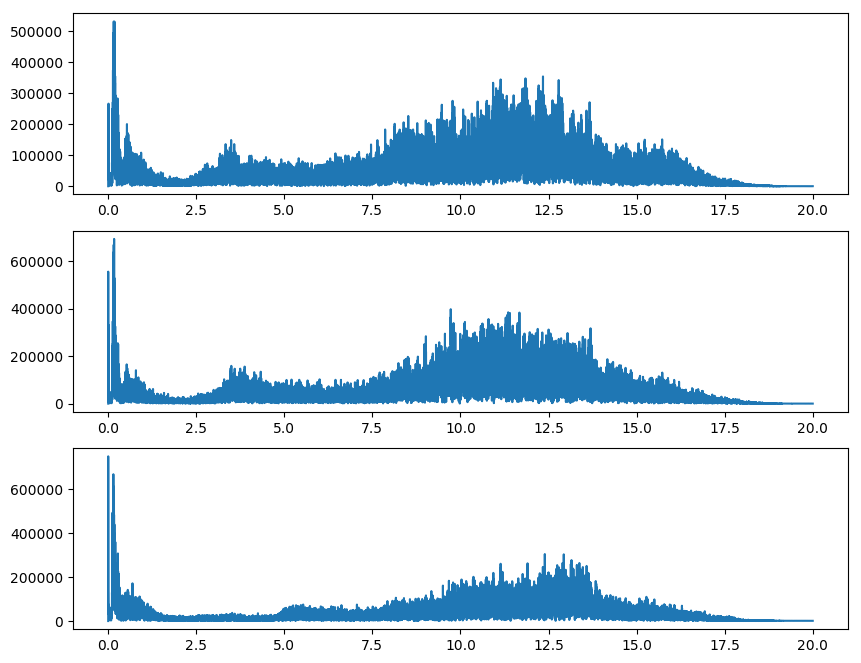

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3c71e28ed0>

In [19]:
fig = figure(figsize=(10,8))
subplot(311)
plot(s[1:nn],abs.(foE[1:nn]))
subplot(312)
plot(s[1:nn],abs.(foN[1:nn]))
subplot(313)
plot(s[1:nn],abs.(foZ[1:nn]))

In [20]:
responsetype = Bandpass(10,15; fs=40)
design = Butterworth(8)
sisfil = filt(digitalfilter(responsetype,design),datE[:,2]);

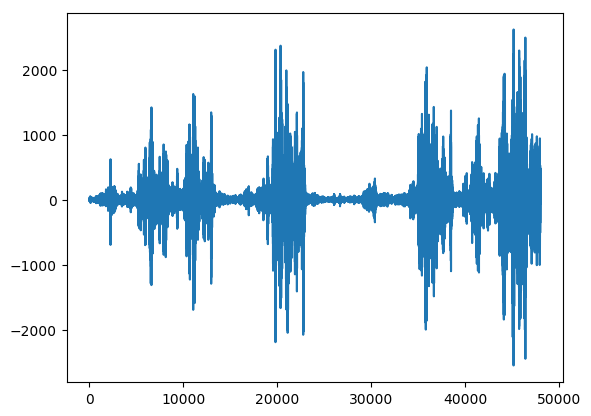

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3c71be9510>

In [21]:
plot(sisfil)

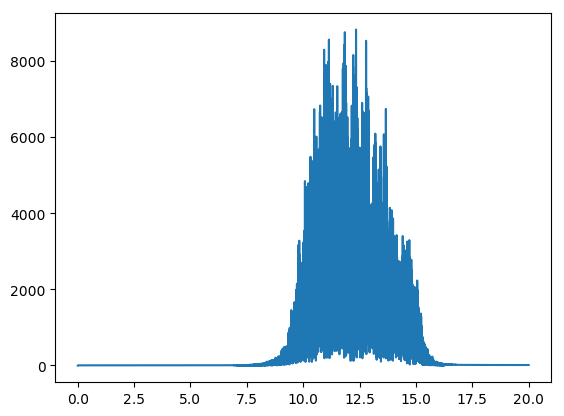

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3c71b1b490>

In [22]:
sis = abs.(fft(sisfil,1))*dt;
sis[1]=0
plot(s[1:nn],sis[1:nn])

In [25]:
function MA(x,n)
    #if size(x,1)==1
     #   x = x'
    #end
    y = zeros(length(x))
    sx = size(x,2)
    tape = NaN*(zeros(convert(Int,floor(n/2)),sx))
    x1 = [tape;x;tape] 
    n1 = n-1
    for ii=1:size(y,1)
        sel = x1[ii+(0:n1),:]
        y[ii]=mean(sel[!isnan.(sel)]);
    end
    return y
end

MA (generic function with 1 method)

In [24]:
pro = MA(abs.(foE),400);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] isnan(::Array{Float64,2}) at ./deprecated.jl:57
 [3] MA(::Array{Float64,1}, ::Int64) at ./In[23]:12
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /home/vhmar/.julia/v0.6/Compat/src/Compat.jl:464
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/vhmar/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /home/vhmar/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[24], in expression starting on line 1


In [15]:
y = randn(10)
x = zeros(length(y))

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
size(y,2)

1

In [17]:
convert(Int,floor(1.5))

1

In [26]:
#Filtro MA (Moving Avarage) con filt
b = ones(400)*(1/400);
ma = filt(b,1,abs.(foE));

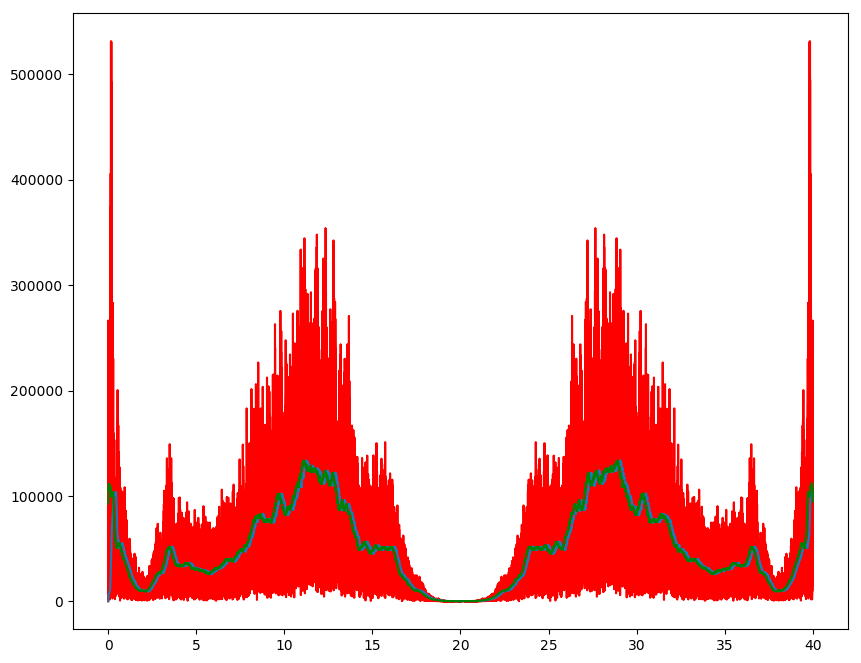

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::Array{Complex{Float64},1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /home/vhmar/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/vhmar/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /home/vhmar/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[28], in expression starting on line 2


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3c719fa790>

In [28]:
fig = figure(figsize=(10,8))
plot(s,abs.(foE),"r")
plot(s,ma)
plot(s,pro,"g")

In [20]:
[pro ma]

48000x2 Array{Float64,2}:
  92844.6       0.0  
  93675.5     359.181
  94101.1     515.719
  96066.4     743.119
  97016.4    1068.26 
  97925.1    1210.2  
  98481.9    1629.55 
  99177.8    1961.12 
 100889.0    2038.64 
 101643.0    2487.6  
 102627.0    2906.1  
 102617.0    3572.2  
 103000.0    3717.27 
      ⋮              
 103507.0  100381.0  
 103488.0  100958.0  
 103106.0  101265.0  
 103118.0  101585.0  
 102132.0  101503.0  
 101376.0  101554.0  
  99659.2  101802.0  
  98962.3  101900.0  
  98405.1  102064.0  
  97494.3  102210.0  
  96542.0  102310.0  
  94569.3  102626.0  

In [21]:
mean(j[!isnan(j)])

LoadError: j not defined
while loading In[21], in expression starting on line 1

In [25]:
su = ones(400)*(1/400)
datEma = filt(su,1,datE[:,2])

48000-element Array{Float64,1}:
  0.0575
  0.065 
 -0.0075
 -0.04  
  0.105 
  0.27  
  0.3825
  0.61  
  0.8225
  0.88  
  0.8875
  0.885 
  0.8025
  ⋮     
 -5.015 
 -5.62  
 -5.4775
 -2.325 
 -0.705 
  0.5375
  0.175 
  0.965 
  4.3475
  3.7925
  3.2375
  5.33  

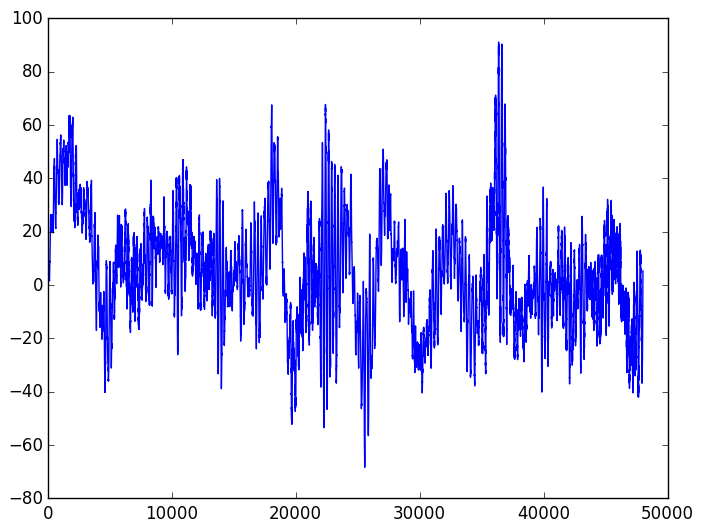

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11fc5e160>

In [26]:
plot(datEma)

In [ ]:
#SMA one line
MA = [mean(ab[i:min(i+n,end)]) for i=1:n:length(ab)];
#imap
MA = imap(mean,partitions(close,60,1))

In [2]:
pwd()

"/Users/vh-marquez/Desktop/clase"

In [3]:
fs

40.0